# Introduction: Plotting Bus Stops as Connected Graphs

Using real-world data for learning graphs. The most effective way to learn is to apply a topic to actual data!

In [1]:
# import geopandas as gpd
import pandas as pd
import numpy as np

In [2]:
import os; os.listdir('.')

['.ipynb_checkpoints',
 'Bus Stop Shelters',
 'Bus_Stop_Shelter.csv',
 'Chapter2-Graphs.ipynb',
 'Chapter3-SmallWorldGraphs.ipynb',
 'Graphing Bus Stops.ipynb',
 'gtfs',
 'routes_bk_bus_may2016.shp',
 'routes_bk_bus_may2016.shx']

In [3]:
bus_stops = pd.read_csv('Bus_Stop_Shelter.csv')
bus_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3428 entries, 0 to 3427
Data columns (total 18 columns):
CounDist      3428 non-null int64
BoroCD        3428 non-null int64
AssemDist     3428 non-null int64
the_geom      3428 non-null object
CongDist      3428 non-null int64
StSenDist     3428 non-null int64
SHELTER_ID    3428 non-null object
LOCATION      3428 non-null object
AT_BETWEEN    3428 non-null object
LONGITUDE     3428 non-null float64
LATITUDE      3428 non-null float64
AssetID       3428 non-null int64
BoroCode      3428 non-null int64
BoroName      3428 non-null object
Street        3424 non-null object
SegmentID     3424 non-null float64
PhysicalID    3428 non-null int64
NODEID        3428 non-null int64
dtypes: float64(3), int64(9), object(6)
memory usage: 482.1+ KB


In [4]:
bus_stops.head()

,CounDist,BoroCD,AssemDist,the_geom,CongDist,StSenDist,SHELTER_ID,LOCATION,AT_BETWEEN,LONGITUDE,LATITUDE,AssetID,BoroCode,BoroName,Street,SegmentID,PhysicalID,NODEID
0,34,301,53,POINT (-73.94783099999995 40.70681200000007),7,18,BR0003,MONTROSE AV,LORIMER ST,-73.947831,40.706812,1,3,Brooklyn,MONTROSE AVENUE,31244.0,91546,0
1,34,301,50,POINT (-73.94516199999998 40.71909700000003),12,18,BR0014,GRAHAM AV,HERBERT ST,-73.945162,40.719097,2,3,Brooklyn,GRAHAM AVENUE,35598.0,45754,0
2,34,301,53,POINT (-73.94578299999995 40.702976000000035),7,18,BR0026,BROADWAY,LEONARD ST,-73.945783,40.702976,3,3,Brooklyn,BROADWAY,31350.0,43972,19920
3,34,301,50,POINT (-73.94083599999993 40.72019500000005),12,18,BR0028,KINGSLAND AV,HERBERT ST,-73.940836,40.720195,4,3,Brooklyn,KINGSLAND AVENUE,65844.0,48893,40551
4,35,302,50,POINT (-73.96979499999998 40.69344000000007),8,25,BR0040,VANDERBILT AV,MYRTLE AV,-73.969795,40.693440,5,3,Brooklyn,VANDERBILT AVENUE,30196.0,60512,0


In [5]:
import plotly_express as px

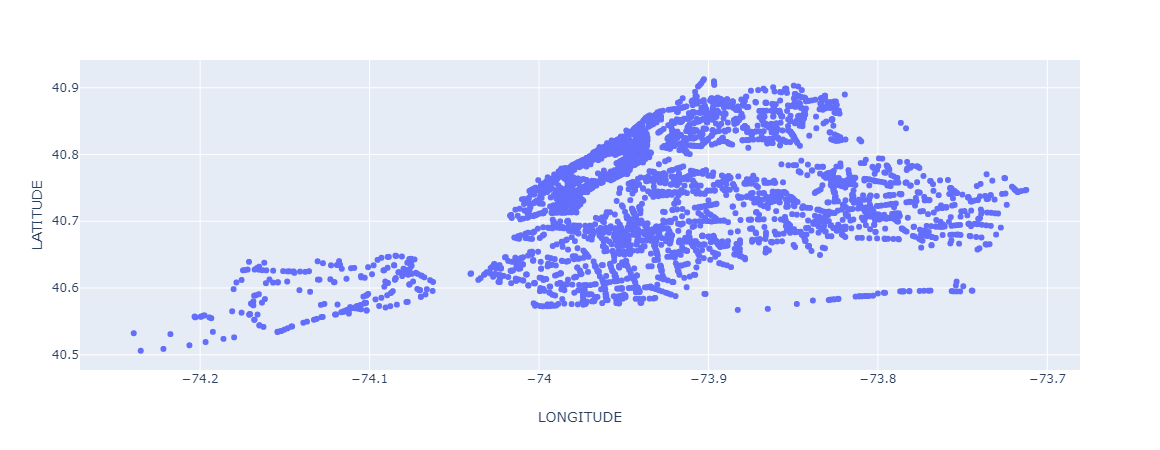

In [6]:
px.scatter(bus_stops, 'LONGITUDE', 'LATITUDE')

In [7]:
import geopandas as gpd

gdf = gpd.read_file('Bus Stop Shelters/geo_export_513a402e-f182-4e3d-8b3c-554c8832cd37.shp')

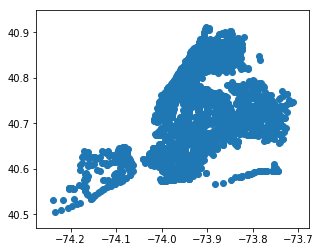

In [8]:
%matplotlib inline
gdf.plot()

In [13]:
bus_routes = gpd.read_file('routes_bk_bus_may2016.shp')
bus_routes.head()

,geometry
0,(LINESTRING (977832.7128473927 174446.67253289...
1,LINESTRING (999030.4704292536 169521.382392126...
2,(LINESTRING (994862.7787852731 177886.76567876...
3,LINESTRING (1011842.844818904 185860.749724113...
4,LINESTRING (1018405.33170186 177109.3672240779...


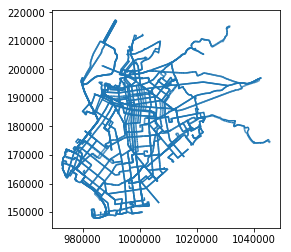

In [15]:
bus_routes.plot()

# Working with gtfs data

Let's try another approach. This time we will attempt to link together the stations on the same routes.

In [4]:
import pandas as pd
import numpy as np

In [5]:
import os; os.listdir('gtfs')

['agency.txt',
 'calendar.txt',
 'calendar_dates.txt',
 'routes.txt',
 'shapes.txt',
 'stops.txt',
 'stop_times.txt',
 'trips.txt']

In [89]:
routes = pd.read_csv('gtfs/routes.txt')
routes.tail()

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
85,QM7,MTABC,QM7,Fresh Meadows - Downtown,Via 188Th St / Union Turnpike,3,http://web.mta.info/busco/schedules/qm007cur.pdf,00933C,FFFFFF
86,QM8,MTABC,QM8,Glen Oaks - Downtown,Via Little Neck Pkwy / H H Expwy / 73 Av,3,http://web.mta.info/busco/schedules/qm007cur.pdf,00933C,FFFFFF
87,Q52+,MTABC,Q52-SBS,Elmhurst - Arverne,Via Woodhaven Blvd / Cross Bay Blvd,3,http://web.mta.info/busco/schedules/q052scur.pdf,FAA61A,FFFFFF
88,Q53+,MTABC,Q53-SBS,Woodside - Rockaway Park,Via Broadway /Queens Blvd / Woodhaven Blvd / C...,3,http://web.mta.info/busco/schedules/q052scur.pdf,FAA61A,FFFFFF
89,Q70+,MTABC,Q70-SBS,LaGuardia Link,"Woodside LIRR, Jackson Heights E F M R 7 Subwa...",3,http://web.mta.info/busco/schedules/q070scur.pdf,EE352E,FFFFFF


In [90]:
stops = pd.read_csv('gtfs/stops.txt')
stops.tail()

,stop_id,stop_name,stop_desc,stop_lat,stop_lon
3607,985005,S BROADWAY/NEW MAIN ST,S BROADWAY & NEW MAIN ST,40.933637,-73.897818
3608,985006,S BROADWAY/PROSPECT AV,S BROADWAY & PROSPECT AV,40.932045,-73.899141
3609,985007,S BROADWAY/McLEAN AV,S BROADWAY & McLEAN AV,40.920549,-73.896247
3610,985008,S BROADWAY/VARK ST,S BROADWAY & VARK ST,40.928762,-73.896532
3611,985009,S BROADWAY/RADFORD ST,S BROADWAY & RADFORD ST,40.917289,-73.896847


In [91]:
from shapely import geometry

stop_points = [geometry.Point(lon, lat) for lon, lat in zip(stops['stop_lon'], stops['stop_lat'])]
stops['geometry'] = stop_points

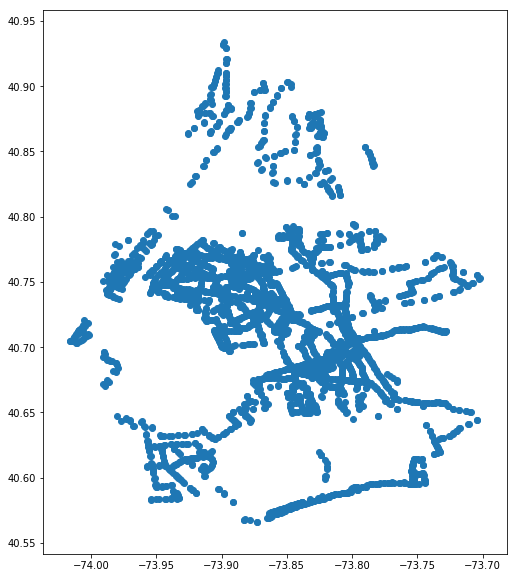

In [92]:
%matplotlib inline

import geopandas as gpd

ax = gpd.GeoDataFrame(stops).plot(figsize=(12, 10))

In [12]:
stops.head()

,stop_id,stop_name,stop_desc,stop_lat,stop_lon,geometry
0,100025,GRAND CONCOURSE/E 161 ST,GRAND CONCOURSE & E 161 ST,40.826617,-73.922643,POINT (-73.92264300000001 40.826617)
1,100027,GRAND CONCOURSE/E 165 ST,GRAND CONCOURSE & E 165 ST,40.831320,-73.919940,POINT (-73.91994 40.83132)
2,100033,GRAND CONCOURSE/MT EDEN AV,GRAND CONCOURSE & MT EDEN AV,40.843405,-73.911639,POINT (-73.91163900000001 40.843405)
3,100039,GRAND CONCOURSE/E BURNSIDE AV,GRAND CONCOURSE & E BURNSIDE AV,40.852124,-73.903580,POINT (-73.90358000000001 40.852124)
4,100045,GRAND CONCOURSE/E FORDHAM RD,GRAND CONCOURSE & E FORDHAM RD,40.862958,-73.896434,POINT (-73.896434 40.862958)


In [13]:
routes.head()

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,Q06,MTABC,Q6,Sutphin Boulevard,Via Sutphin Blvd / Rockaway Blvd,3,http://web.mta.info/busco/schedules/q006cur.pdf,B933AD,FFFFFF
1,Q07,MTABC,Q7,Rockaway Boulevard,Via Rockaway Blvd,3,http://web.mta.info/busco/schedules/q007cur.pdf,6CBE45,FFFFFF
2,Q08,MTABC,Q8,101St Avenue,Via 101St Av,3,http://web.mta.info/busco/schedules/q008cur.pdf,B933AD,FFFFFF
3,Q09,MTABC,Q9,Lincoln Street,Via Van Wyck Expwy / 135Th St / Lincoln St,3,http://web.mta.info/busco/schedules/q009cur.pdf,B933AD,FFFFFF
4,Q10,MTABC,Q10,Kew Gardens - Jfk Airport,Via Lefferts Blvd,3,http://web.mta.info/busco/schedules/q010cur.pdf,FAA61A,FFFFFF


In [14]:
trips = pd.read_csv('gtfs/trips.txt')
trips.tail()

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
43626,B103,SCPB9-SC_B9-Weekday-10-SDon,23564301-SCPB9-SC_B9-Weekday-10-SDon,LIMITED CANARSIE - WILLIAMS AVE via AVENUE H v...,0,4519010,B1030139
43627,B103,SCPB9-SC_B9-Weekday-10-SDon,23564304-SCPB9-SC_B9-Weekday-10-SDon,LIMITED CANARSIE - WILLIAMS AVE via AVENUE H v...,0,4519011,B1030140
43628,B103,SCPB9-SC_B9-Weekday-10-SDon,23564306-SCPB9-SC_B9-Weekday-10-SDon,LIMITED CANARSIE - WILLIAMS AVE via AVENUE H v...,0,4519011,B1030140
43629,B103,SCPB9-SC_B9-Weekday-10-SDon,23564307-SCPB9-SC_B9-Weekday-10-SDon,LIMITED DOWNTOWN BKLYN - TILLARY ST via AVENUE...,1,4519011,B1030152
43630,B103,SCPB9-SC_B9-Weekday-10-SDon,23564308-SCPB9-SC_B9-Weekday-10-SDon,LIMITED CANARSIE - WILLIAMS AVE via AVENUE H v...,0,4519011,B1030139


In [132]:
tt = pd.read_csv('gtfs/stop_times.txt')
tt.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
0,23617854-BPPB9-BP_B9-Weekday-10,00:00:00,00:00:00,551840,1,0,0
1,23617854-BPPB9-BP_B9-Weekday-10,00:00:29,00:00:29,551841,2,0,0
2,23617854-BPPB9-BP_B9-Weekday-10,00:01:00,00:01:00,551843,3,0,0
3,23617854-BPPB9-BP_B9-Weekday-10,00:01:24,00:01:24,551844,4,0,0
4,23617854-BPPB9-BP_B9-Weekday-10,00:01:58,00:01:58,551834,5,0,0


In [133]:
paths = tt.merge(stops, on='stop_id')
paths = paths.merge(trips, on='trip_id')
paths = paths.sort_values(['trip_id', 'stop_sequence'])
paths.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,stop_name,stop_desc,stop_lat,stop_lon,geometry,route_id,service_id,trip_headsign,direction_id,block_id,shape_id
267246,22602444-SCPA9-SC_A9-Saturday-10,06:00:00,06:00:00,350019,1,0,1,56 DR / STRICKLAND AV,56 DR & STRICKLAND AV,40.608660,-73.913789,POINT (-73.91378900000001 40.60866),BM1,SCPA9-SC_A9-Saturday-10,MIDTOWN - 57 ST via CHURCH ST - via MADISON AV,1,4342564,BM10140
267247,22602444-SCPA9-SC_A9-Saturday-10,06:00:13,06:00:13,350017,2,0,1,56 DR / E 63 ST,56 DR & E 63 ST,40.607860,-73.912909,POINT (-73.912909 40.60786),BM1,SCPA9-SC_A9-Saturday-10,MIDTOWN - 57 ST via CHURCH ST - via MADISON AV,1,4342564,BM10140
267248,22602444-SCPA9-SC_A9-Saturday-10,06:00:40,06:00:40,350018,3,0,1,56 DR / E 66 ST,56 DR & E 66 ST,40.606229,-73.911084,POINT (-73.911084 40.606229),BM1,SCPA9-SC_A9-Saturday-10,MIDTOWN - 57 ST via CHURCH ST - via MADISON AV,1,4342564,BM10140
267249,22602444-SCPA9-SC_A9-Saturday-10,06:01:03,06:01:03,350090,4,0,1,E 66 ST / DAKOTA PL,E 66 ST & DAKOTA PL,40.607205,-73.909075,POINT (-73.909075 40.607205),BM1,SCPA9-SC_A9-Saturday-10,MIDTOWN - 57 ST via CHURCH ST - via MADISON AV,1,4342564,BM10140
267250,22602444-SCPA9-SC_A9-Saturday-10,06:01:38,06:01:38,350089,5,0,1,E 66 ST / BASSETT AV,E 66 ST & BASSETT AV,40.609603,-73.907077,POINT (-73.907077 40.609603),BM1,SCPA9-SC_A9-Saturday-10,MIDTOWN - 57 ST via CHURCH ST - via MADISON AV,1,4342564,BM10140


In [145]:
trip = paths[paths['trip_id'] == paths['trip_id'][0]]
trip.tail()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,stop_name,stop_desc,stop_lat,stop_lon,geometry,route_id,service_id,trip_headsign,direction_id,block_id,shape_id
12,23617854-BPPB9-BP_B9-Weekday-10,00:05:36,00:05:36,551817,13,0,0,JEWEL AV/PARK DR E,JEWEL AV & PARK DR E,40.728112,-73.831637,POINT (-73.831637 40.728112),Q64,BPPB9-BP_B9-Weekday-10,FOREST HILLS 71 AV STA via JEWEL AV via 69 RD,1,4528660,Q640095
13,23617854-BPPB9-BP_B9-Weekday-10,00:07:28,00:07:28,551847,14,0,0,69 RD/112 ST,69 RD & 112 ST,40.725655,-73.840949,POINT (-73.84094899999999 40.725655),Q64,BPPB9-BP_B9-Weekday-10,FOREST HILLS 71 AV STA via JEWEL AV via 69 RD,1,4528660,Q640095
14,23617854-BPPB9-BP_B9-Weekday-10,00:07:55,00:07:55,551848,15,0,0,69 RD/110 ST,69 RD & 110 ST,40.725008,-73.843170,POINT (-73.84317 40.725008),Q64,BPPB9-BP_B9-Weekday-10,FOREST HILLS 71 AV STA via JEWEL AV via 69 RD,1,4528660,Q640095
15,23617854-BPPB9-BP_B9-Weekday-10,00:08:22,00:08:22,550957,16,0,0,108 ST/69 RD,108 ST & 69 RD,40.724161,-73.845184,POINT (-73.845184 40.724161),Q64,BPPB9-BP_B9-Weekday-10,FOREST HILLS 71 AV STA via JEWEL AV via 69 RD,1,4528660,Q640095
16,23617854-BPPB9-BP_B9-Weekday-10,00:09:00,00:09:00,982087,17,0,0,108 ST/QUEENS BL,108 ST & QUEENS BL,40.721815,-73.843925,POINT (-73.843925 40.721815),Q64,BPPB9-BP_B9-Weekday-10,FOREST HILLS 71 AV STA via JEWEL AV via 69 RD,1,4528660,Q640095


In [146]:
(paths.groupby(['trip_id'])['route_id'].nunique() == 1).all()

True

In [147]:
paths['route_id'].unique()

array(['BM1', 'BM3', 'BM2', 'BM4', 'BM5', 'B100', 'B103', 'Q08', 'Q09',
       'Q52+', 'Q60', 'Q06', 'Q10', 'Q07', 'Q40', 'Q37', 'Q41', 'Q11',
       'Q35', 'Q21', 'Q22', 'QM15', 'QM18', 'QM17', 'QM16', 'Q23', 'Q19',
       'QM36', 'QM35', 'QM32', 'QM42', 'QM40', 'QM31', 'QM5', 'QM1',
       'Q65', 'Q25', 'Q66', 'QM6', 'QM11', 'Q38', 'QM3', 'QM7', 'QM8',
       'QM12', 'QM10', 'QM2', 'QM20', 'BXM9', 'Q34', 'Q53+', 'Q101',
       'Q33', 'Q104', 'Q18', 'Q29', 'Q39', 'Q47', 'Q49', 'Q67', 'Q69',
       'Q72', 'Q100', 'Q70+', 'Q103', 'Q102', 'QM34', 'QM25', 'QM24',
       'Q50', 'BX23', 'BXM10', 'BXM6', 'BXM7', 'BXM8', 'BXM2', 'BXM11',
       'BXM18', 'BXM4', 'BXM3', 'BXM1', 'Q64', 'Q110', 'Q112', 'Q111',
       'Q114', 'Q113', 'QM4', 'QM21', 'QM44'], dtype=object)

In [149]:
b100 = paths[paths['route_id'] == 'B100']
b100.tail()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,stop_name,stop_desc,stop_lat,stop_lon,geometry,route_id,service_id,trip_headsign,direction_id,block_id,shape_id
1430859,23564864-SCPB9-SC_B9-Saturday-10,25:16:41,25:16:41,350088,24,0,0,E 66 ST / BASSETT AV,E 66 ST & BASSETT AV,40.609939,-73.907128,POINT (-73.907128 40.609939),B100,SCPB9-SC_B9-Saturday-10,MILL BASIN E. 66 ST,0,4519132,B1000099
1430860,23564864-SCPB9-SC_B9-Saturday-10,25:17:22,25:17:22,350093,25,0,0,E 66 ST / MAYFAIR DR S,E 66 ST & MAYFAIR DR S,40.608084,-73.908413,POINT (-73.908413 40.60808400000001),B100,SCPB9-SC_B9-Saturday-10,MILL BASIN E. 66 ST,0,4519132,B1000099
1430861,23564864-SCPB9-SC_B9-Saturday-10,25:18:10,25:18:10,350086,26,0,0,E 66 ST / 56 DR,E 66 ST & 56 DR,40.606298,-73.910734,POINT (-73.91073399999999 40.606298),B100,SCPB9-SC_B9-Saturday-10,MILL BASIN E. 66 ST,0,4519132,B1000099
1430862,23564864-SCPB9-SC_B9-Saturday-10,25:19:04,25:19:04,350183,27,0,0,NATIONAL DR / E 66 ST,NATIONAL DR & E 66 ST,40.604632,-73.913419,POINT (-73.91341899999999 40.604632),B100,SCPB9-SC_B9-Saturday-10,MILL BASIN E. 66 ST,0,4519132,B1000099
1430883,23564864-SCPB9-SC_B9-Saturday-10,25:20:00,25:20:00,982178,28,0,0,NATIONAL DR / MILL AV,NATIONAL DR & MILL AV,40.606858,-73.915899,POINT (-73.915899 40.606858),B100,SCPB9-SC_B9-Saturday-10,MILL BASIN E. 66 ST,0,4519132,B1000099


In [162]:
from tqdm import tqdm_notebook

longest_trips = []

for route, grouped in tqdm_notebook(paths.groupby('route_id')):
    trip_nums = grouped.groupby('trip_id')['trip_id'].count()
    longest_trips.append(dict(route=route, longest_trip=trip_nums.sort_values().index[-1]))

In [182]:
def info_from_trip(trip):
    """
    Extract info, nodes, positions, and travel times from a trip
    
    :param trip: dataframe of information from a single trip
    
    :return dict: a dictionary of information, nodes, positions, and edges
    """
    trip = trip.copy()
    trip = trip.sort_values('stop_sequence')
    
    # Get the next stop and previous stop
    trip['stop_next'] = trip['stop_id'].shift(-1)
    trip['stop_previous'] = trip['stop_id'].shift(1)
    
    # Convert the times to datetimes for finding travel time
    trip['arrival_time'] = pd.to_datetime(trip['arrival_time'])
    trip['departure_time'] = pd.to_datetime(trip['departure_time'])

    # Calculate the travel time in minutes from the previous stop
    trip['travel_time'] = (trip['arrival_time'] - trip['departure_time'].shift(1)) / pd.Timedelta(minutes=1)
    
    # Subset to the columns to keep
    trip = trip[['trip_id', 'stop_id', 'stop_next', 'stop_previous', 'travel_time', 
                'arrival_time', 'departure_time', 'stop_sequence', 'stop_name', 'geometry', 'stop_lon', 'stop_lat']]
    
    # Nodes are the stops
    nodes = list(trip['stop_id'])
    
    # Labels are a mapping from stop id to stop name
    labels = {id: name for id, name in zip(trip['stop_id'], trip['stop_name'])}
    
    # Positions are a mapping from the stop to the longitude, latitude
    positions = {node: (lon, lat) for node, lon, lat in zip(trip['stop_id'], trip['stop_lon'], trip['stop_lat'])}
    
    # Edges in a dictionary mapping from previous stop to stop with travel time from previous stop to stop
    edges = {(previous, current): travel_time for previous, current, travel_time in zip(trip['stop_previous'], trip['stop_id'], trip['travel_time']) if 
            not np.isnan(previous)}
    
    return dict(trip_info=trip, nodes=nodes, positions=positions, labels=labels, edges=edges)

d = info_from_trip(paths[paths['trip_id'] == longest_trips[0]['longest_trip']])
d['trip_info'].head()

,trip_id,stop_id,stop_next,stop_previous,travel_time,arrival_time,departure_time,stop_sequence,stop_name,geometry,stop_lon,stop_lat
1353260,22602546-SCPA9-SC_A9-Saturday-10,350184,350019.0,NaN,NaN,2019-05-18 05:55:00,2019-05-18 05:55:00,1,NATIONAL DR / MILL AV,POINT (-73.915935 40.606942),-73.915935,40.606942
1353252,22602546-SCPA9-SC_A9-Saturday-10,350019,350017.0,350184.0,1.000000,2019-05-18 05:56:00,2019-05-18 05:56:00,2,56 DR / STRICKLAND AV,POINT (-73.91378900000001 40.60866),-73.913789,40.608660
1353253,22602546-SCPA9-SC_A9-Saturday-10,350017,350018.0,350019.0,0.316667,2019-05-18 05:56:19,2019-05-18 05:56:19,3,56 DR / E 63 ST,POINT (-73.912909 40.60786),-73.912909,40.607860
1353254,22602546-SCPA9-SC_A9-Saturday-10,350018,350090.0,350017.0,0.666667,2019-05-18 05:56:59,2019-05-18 05:56:59,4,56 DR / E 66 ST,POINT (-73.911084 40.606229),-73.911084,40.606229
1353255,22602546-SCPA9-SC_A9-Saturday-10,350090,350089.0,350018.0,0.583333,2019-05-18 05:57:34,2019-05-18 05:57:34,5,E 66 ST / DAKOTA PL,POINT (-73.909075 40.607205),-73.909075,40.607205


In [185]:
G = nx.DiGraph()
G.add_nodes_from(d['nodes'])
G.add_edges_from(d['edges'])

{(350184.0, 350019): Text(-73.914862, 40.607800999999995, '1.0'),
 (350019.0, 350017): Text(-73.91334900000001, 40.60826, '0.31666666666666665'),
 (350017.0, 350018): Text(-73.9119965, 40.6070445, '0.6666666666666666'),
 (350018.0, 350090): Text(-73.9100795, 40.606717, '0.5833333333333334'),
 (350090.0, 350089): Text(-73.908076, 40.608404, '0.8833333333333333'),
 (350089.0,
  350092): Text(-73.90681000000001, 40.6106345, '0.6333333333333333'),
 (350092.0, 350095): Text(-73.90683949999999, 40.612688500000004, '0.65'),
 (350095.0, 350097): Text(-73.908061, 40.6147125, '0.75'),
 (350097.0, 300242): Text(-73.910056, 40.616525, '0.7333333333333333'),
 (300242.0, 307361): Text(-73.912576, 40.6165235, '0.95'),
 (307361.0, 350062): Text(-73.9149775, 40.616383, '0.6333333333333333'),
 (350062.0, 350059): Text(-73.917239, 40.616202, '0.8'),
 (350059.0, 350124): Text(-73.919197, 40.6151665, '0.36666666666666664'),
 (350124.0,
  350122): Text(-73.92062250000001, 40.614940000000004, '0.366666666666

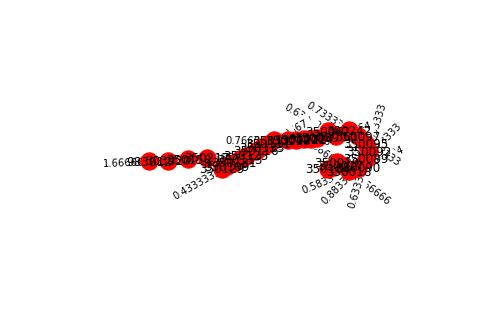

In [187]:
nx.draw(G, pos=d['positions'], with_labels=True)
nx.draw_networkx_edge_labels(G, pos=d['positions'], edge_labels=d['edges'])

In [158]:
trip_nums.sort_values().tail()

trip_id
22604061-SCPA9-SC_A9-Weekday-10         30
23563514-SCPB9-SC_B9-Weekday-10         30
23563514-SCPB9-SC_B9-Weekday-10-SDon    30
23563507-SCPB9-SC_B9-Weekday-10-SDon    30
22602546-SCPA9-SC_A9-Saturday-10        30
Name: trip_id, dtype: int64

In [151]:
b100.groupby('trip_id')['arrival_time'].count()

trip_id
22602546-SCPA9-SC_A9-Saturday-10    30
22602547-SCPA9-SC_A9-Saturday-10    28
22602548-SCPA9-SC_A9-Saturday-10    30
22602549-SCPA9-SC_A9-Saturday-10    28
22602550-SCPA9-SC_A9-Saturday-10    30
22602551-SCPA9-SC_A9-Saturday-10    28
22602552-SCPA9-SC_A9-Saturday-10    30
22602553-SCPA9-SC_A9-Saturday-10    28
22602554-SCPA9-SC_A9-Saturday-10    30
22602555-SCPA9-SC_A9-Saturday-10    28
22602556-SCPA9-SC_A9-Saturday-10    30
22602557-SCPA9-SC_A9-Saturday-10    28
22602558-SCPA9-SC_A9-Saturday-10    30
22602559-SCPA9-SC_A9-Saturday-10    28
22602560-SCPA9-SC_A9-Saturday-10    30
22602561-SCPA9-SC_A9-Saturday-10    28
22602562-SCPA9-SC_A9-Saturday-10    30
22602563-SCPA9-SC_A9-Saturday-10    28
22602564-SCPA9-SC_A9-Saturday-10    30
22602565-SCPA9-SC_A9-Saturday-10    30
22602566-SCPA9-SC_A9-Saturday-10    28
22602567-SCPA9-SC_A9-Saturday-10    30
22602568-SCPA9-SC_A9-Saturday-10    28
22602569-SCPA9-SC_A9-Saturday-10    30
22602570-SCPA9-SC_A9-Saturday-10    28
22602571-SCPA9-SC

In [148]:
paths.groupby('route_id')['trip_id'].count()

route_id
B100     35262
B103     62324
BM1      11332
BM2       8783
BM3       9745
BM4       7018
BM5       4124
BX23      9872
BXM1      4993
BXM10     4959
BXM11     3629
BXM18      378
BXM2      4389
BXM3      3449
BXM4      3069
BXM6      1760
BXM7      6127
BXM8      4170
BXM9      5487
Q06      69584
Q07      47326
Q08      64242
Q09      23684
Q10      86744
Q100      4595
Q101      8364
Q102     10064
Q103      4745
Q104      4399
Q11      32560
         ...  
Q69      22781
Q70+      2653
Q72       8015
QM1        648
QM10       616
QM11      1128
QM12       828
QM15      7380
QM16      1584
QM17      1700
QM18      1180
QM2       5554
QM20      3522
QM21       672
QM24       546
QM25       476
QM3        330
QM31       372
QM32      1032
QM34       480
QM35      1600
QM36       432
QM4       3180
QM40       384
QM42       480
QM44       382
QM5       9324
QM6       4518
QM7       1282
QM8       1836
Name: trip_id, Length: 90, dtype: int64

In [35]:
single = paths[paths['trip_id'] == '23617854-BPPB9-BP_B9-Weekday-10']
single.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 18 columns):
trip_id           17 non-null object
arrival_time      17 non-null object
departure_time    17 non-null object
stop_id           17 non-null int64
stop_sequence     17 non-null int64
pickup_type       17 non-null int64
drop_off_type     17 non-null int64
stop_name         17 non-null object
stop_desc         17 non-null object
stop_lat          17 non-null float64
stop_lon          17 non-null float64
geometry          17 non-null object
route_id          17 non-null object
service_id        17 non-null object
trip_headsign     17 non-null object
direction_id      17 non-null int64
block_id          17 non-null int64
shape_id          17 non-null object
dtypes: float64(2), int64(6), object(10)
memory usage: 2.5+ KB


In [36]:
single['stop_previous'] = single['stop_id'].shift(1).copy()
single['stop_next'] = single['stop_id'].shift(-1).copy()

single.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,stop_name,stop_desc,stop_lat,stop_lon,geometry,route_id,service_id,trip_headsign,direction_id,block_id,shape_id,stop_previous,stop_next
0,23617854-BPPB9-BP_B9-Weekday-10,00:00:00,00:00:00,551840,1,0,0,JEWEL AV/164 ST,JEWEL AV & 164 ST,40.731841,-73.805384,POINT (-73.805384 40.731841),Q64,BPPB9-BP_B9-Weekday-10,FOREST HILLS 71 AV STA via JEWEL AV via 69 RD,1,4528660,Q640095,NaN,551841.0
1,23617854-BPPB9-BP_B9-Weekday-10,00:00:29,00:00:29,551841,2,0,0,JEWEL AV/161 ST,JEWEL AV & 161 ST,40.732107,-73.808141,POINT (-73.80814100000001 40.732107),Q64,BPPB9-BP_B9-Weekday-10,FOREST HILLS 71 AV STA via JEWEL AV via 69 RD,1,4528660,Q640095,551840.0,551843.0
2,23617854-BPPB9-BP_B9-Weekday-10,00:01:00,00:01:00,551843,3,0,0,JEWEL AV/PARSONS BL,JEWEL AV & PARSONS BL,40.732469,-73.811062,POINT (-73.81106199999999 40.732469),Q64,BPPB9-BP_B9-Weekday-10,FOREST HILLS 71 AV STA via JEWEL AV via 69 RD,1,4528660,Q640095,551841.0,551844.0
3,23617854-BPPB9-BP_B9-Weekday-10,00:01:24,00:01:24,551844,4,0,0,JEWEL AV/PARSONS BL,JEWEL AV & PARSONS BL,40.732236,-73.812835,POINT (-73.81283499999999 40.732236),Q64,BPPB9-BP_B9-Weekday-10,FOREST HILLS 71 AV STA via JEWEL AV via 69 RD,1,4528660,Q640095,551843.0,551834.0
4,23617854-BPPB9-BP_B9-Weekday-10,00:01:58,00:01:58,551834,5,0,0,JEWEL AV/KISSENA BL,JEWEL AV & KISSENA BL,40.732135,-73.815248,POINT (-73.815248 40.732135),Q64,BPPB9-BP_B9-Weekday-10,FOREST HILLS 71 AV STA via JEWEL AV via 69 RD,1,4528660,Q640095,551844.0,551831.0


In [38]:
edges = [(previous, current) for previous, current in zip(single['stop_previous'], single['stop_id'])]
edges = [(e[0], e[1]) for e in edges if not np.isnan(e[0]) or np.isnan(e[1])]
edges

[(551840.0, 551841),
 (551841.0, 551843),
 (551843.0, 551844),
 (551844.0, 551834),
 (551834.0, 551831),
 (551831.0, 551829),
 (551829.0, 551827),
 (551827.0, 551825),
 (551825.0, 551823),
 (551823.0, 551821),
 (551821.0, 551819),
 (551819.0, 551817),
 (551817.0, 551847),
 (551847.0, 551848),
 (551848.0, 550957),
 (550957.0, 982087)]

In [42]:
nodes = list(single['stop_id'])
labels = {id: name for id, name in zip(single['stop_id'], single['stop_name'])}
positions = {node: (lon, lat) for node, lon, lat in zip(single['stop_id'], single['stop_lon'], single['stop_lat'])}
positions

{551840: (-73.805384, 40.731840999999996),
 551841: (-73.808141, 40.732107),
 551843: (-73.81106199999999, 40.732469),
 551844: (-73.81283499999999, 40.732236),
 551834: (-73.815248, 40.732135),
 551831: (-73.817786, 40.731808),
 551829: (-73.81920699999999, 40.731390999999995),
 551827: (-73.82174599999999, 40.730635),
 551825: (-73.823774, 40.730024),
 551823: (-73.82574, 40.729493),
 551821: (-73.827823, 40.728893),
 551819: (-73.829651, 40.728303000000004),
 551817: (-73.831637, 40.728112),
 551847: (-73.840949, 40.725654999999996),
 551848: (-73.84317, 40.725008),
 550957: (-73.845184, 40.724160999999995),
 982087: (-73.843925, 40.721815)}

In [45]:
labels

{551840: 'JEWEL AV/164 ST',
 551841: 'JEWEL AV/161 ST',
 551843: 'JEWEL AV/PARSONS BL',
 551844: 'JEWEL AV/PARSONS BL',
 551834: 'JEWEL AV/KISSENA BL',
 551831: 'JEWEL AV/152 ST',
 551829: 'JEWEL AV/150 ST',
 551827: 'JEWEL AV/147 ST',
 551825: 'JEWEL AV/MAIN ST',
 551823: 'JEWEL AV/140 ST',
 551821: 'JEWEL AV/138 ST',
 551819: 'JEWEL AV/136 ST',
 551817: 'JEWEL AV/PARK DR E',
 551847: '69 RD/112 ST',
 551848: '69 RD/110 ST',
 550957: '108 ST/69 RD',
 982087: '108 ST/QUEENS BL'}

In [43]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from(positions)
G.add_edges_from(edges)

In [50]:
paths.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,stop_name,stop_desc,stop_lat,stop_lon,geometry,route_id,service_id,trip_headsign,direction_id,block_id,shape_id
0,23617854-BPPB9-BP_B9-Weekday-10,00:00:00,00:00:00,551840,1,0,0,JEWEL AV/164 ST,JEWEL AV & 164 ST,40.731841,-73.805384,POINT (-73.805384 40.731841),Q64,BPPB9-BP_B9-Weekday-10,FOREST HILLS 71 AV STA via JEWEL AV via 69 RD,1,4528660,Q640095
1,23617854-BPPB9-BP_B9-Weekday-10,00:00:29,00:00:29,551841,2,0,0,JEWEL AV/161 ST,JEWEL AV & 161 ST,40.732107,-73.808141,POINT (-73.80814100000001 40.732107),Q64,BPPB9-BP_B9-Weekday-10,FOREST HILLS 71 AV STA via JEWEL AV via 69 RD,1,4528660,Q640095
2,23617854-BPPB9-BP_B9-Weekday-10,00:01:00,00:01:00,551843,3,0,0,JEWEL AV/PARSONS BL,JEWEL AV & PARSONS BL,40.732469,-73.811062,POINT (-73.81106199999999 40.732469),Q64,BPPB9-BP_B9-Weekday-10,FOREST HILLS 71 AV STA via JEWEL AV via 69 RD,1,4528660,Q640095
3,23617854-BPPB9-BP_B9-Weekday-10,00:01:24,00:01:24,551844,4,0,0,JEWEL AV/PARSONS BL,JEWEL AV & PARSONS BL,40.732236,-73.812835,POINT (-73.81283499999999 40.732236),Q64,BPPB9-BP_B9-Weekday-10,FOREST HILLS 71 AV STA via JEWEL AV via 69 RD,1,4528660,Q640095
4,23617854-BPPB9-BP_B9-Weekday-10,00:01:58,00:01:58,551834,5,0,0,JEWEL AV/KISSENA BL,JEWEL AV & KISSENA BL,40.732135,-73.815248,POINT (-73.815248 40.732135),Q64,BPPB9-BP_B9-Weekday-10,FOREST HILLS 71 AV STA via JEWEL AV via 69 RD,1,4528660,Q640095


In [57]:
pd.Timestamp('00:00:00')

Timestamp('2019-05-17 00:00:00')

In [61]:
trip['arrival_time'] = pd.to_datetime(trip['arrival_time'])
trip['departure_time'] = pd.to_datetime(trip['departure_time'])

trip['travel_time'] = (trip['arrival_time'] - trip['departure_time'].shift(1)) / pd.Timedelta(minutes=1)
trip.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,stop_name,stop_desc,stop_lat,stop_lon,geometry,route_id,service_id,trip_headsign,direction_id,block_id,shape_id,travel_time
0,23617854-BPPB9-BP_B9-Weekday-10,2019-05-17 00:00:00,2019-05-17 00:00:00,551840,1,0,0,JEWEL AV/164 ST,JEWEL AV & 164 ST,40.731841,-73.805384,POINT (-73.805384 40.731841),Q64,BPPB9-BP_B9-Weekday-10,FOREST HILLS 71 AV STA via JEWEL AV via 69 RD,1,4528660,Q640095,NaN
1,23617854-BPPB9-BP_B9-Weekday-10,2019-05-17 00:00:29,2019-05-17 00:00:29,551841,2,0,0,JEWEL AV/161 ST,JEWEL AV & 161 ST,40.732107,-73.808141,POINT (-73.80814100000001 40.732107),Q64,BPPB9-BP_B9-Weekday-10,FOREST HILLS 71 AV STA via JEWEL AV via 69 RD,1,4528660,Q640095,0.483333
2,23617854-BPPB9-BP_B9-Weekday-10,2019-05-17 00:01:00,2019-05-17 00:01:00,551843,3,0,0,JEWEL AV/PARSONS BL,JEWEL AV & PARSONS BL,40.732469,-73.811062,POINT (-73.81106199999999 40.732469),Q64,BPPB9-BP_B9-Weekday-10,FOREST HILLS 71 AV STA via JEWEL AV via 69 RD,1,4528660,Q640095,0.516667
3,23617854-BPPB9-BP_B9-Weekday-10,2019-05-17 00:01:24,2019-05-17 00:01:24,551844,4,0,0,JEWEL AV/PARSONS BL,JEWEL AV & PARSONS BL,40.732236,-73.812835,POINT (-73.81283499999999 40.732236),Q64,BPPB9-BP_B9-Weekday-10,FOREST HILLS 71 AV STA via JEWEL AV via 69 RD,1,4528660,Q640095,0.400000
4,23617854-BPPB9-BP_B9-Weekday-10,2019-05-17 00:01:58,2019-05-17 00:01:58,551834,5,0,0,JEWEL AV/KISSENA BL,JEWEL AV & KISSENA BL,40.732135,-73.815248,POINT (-73.815248 40.732135),Q64,BPPB9-BP_B9-Weekday-10,FOREST HILLS 71 AV STA via JEWEL AV via 69 RD,1,4528660,Q640095,0.566667


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
edges = [{(previous, current): travel_time} for previous, current, travel_time in zip(trip['stop_previous'], trip['stop_id'], trip['travel_time'])]

In [85]:
def graph_from_trip(trip):
    trip = trip.sort_values('stop_sequence')
    trip['stop_next'] = trip['stop_id'].shift(-1)
    trip['stop_previous'] = trip['stop_id'].shift(1)
    
    trip['arrival_time'] = pd.to_datetime(trip['arrival_time'])
    trip['departure_time'] = pd.to_datetime(trip['departure_time'])

    trip['travel_time'] = (trip['arrival_time'] - trip['departure_time'].shift(1)) / pd.Timedelta(minutes=1)
    
    nodes = list(trip['stop_id'])
    
    labels = {id: name for id, name in zip(trip['stop_id'], trip['stop_name'])}
    positions = {node: (lon, lat) for node, lon, lat in zip(trip['stop_id'], trip['stop_lon'], trip['stop_lat'])}
    
    edges = [(previous, current, travel_time) for previous, current, travel_time in zip(trip['stop_previous'], trip['stop_id'], trip['travel_time'])]
    edges = {(e[0], e[1]): e[2] for e in edges if not np.isnan(e[0]) or np.isnan(e[1])}
    
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    
    return G, positions, edges

trip1, positions, edges = graph_from_trip(paths[paths['trip_id'] == paths['trip_id'][500]])

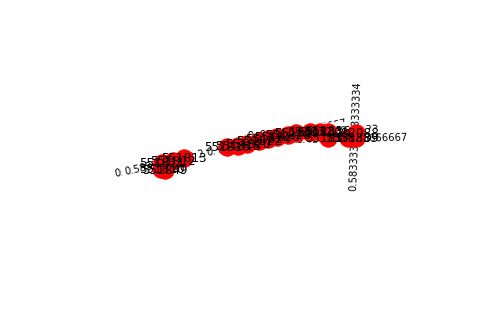

In [86]:
nx.draw(trip1, positions, with_labels=True)
_ = nx.draw_networkx_edge_labels(trip1, positions, edge_labels=edges)

In [88]:
paths['route_id'].unique()

array(['Q64'], dtype=object)

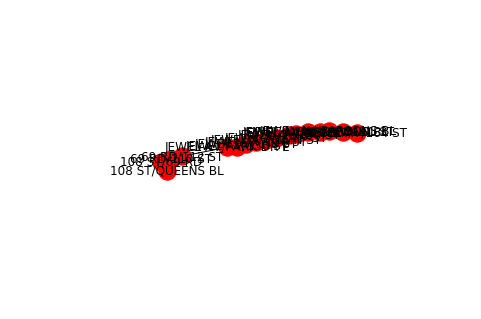

In [49]:
nx.draw(trip1, pos=positions, withlabels=True, figsize=(20, 20), scale=5)
_ = nx.draw_networkx_labels(G, pos=positions, labels=labels)

In [33]:
positions

{551840: (-73.805384, 40.731840999999996),
 551841: (-73.808141, 40.732107),
 551843: (-73.81106199999999, 40.732469),
 551844: (-73.81283499999999, 40.732236),
 551834: (-73.815248, 40.732135),
 551831: (-73.817786, 40.731808),
 551829: (-73.81920699999999, 40.731390999999995),
 551827: (-73.82174599999999, 40.730635),
 551825: (-73.823774, 40.730024),
 551823: (-73.82574, 40.729493),
 551821: (-73.827823, 40.728893),
 551819: (-73.829651, 40.728303000000004),
 551817: (-73.831637, 40.728112),
 551847: (-73.840949, 40.725654999999996),
 551848: (-73.84317, 40.725008),
 550957: (-73.845184, 40.724160999999995),
 982087: (-73.843925, 40.721815)}

In [32]:
list(G.edges)

[(551840, 551841),
 (551841, 551843),
 (551843, 551844),
 (551844, 551834),
 (551834, 551831),
 (551831, 551829),
 (551829, 551827),
 (551827, 551825),
 (551825, 551823),
 (551823, 551821),
 (551821, 551819),
 (551819, 551817),
 (551817, 551847),
 (551847, 551848),
 (551848, 550957),
 (550957, 982087)]